In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("Mental_Health_Dataset.csv")

In [3]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [5]:
missing_values = df.isnull().sum()

In [6]:
print(missing_values)

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64


In [7]:
df.describe(include='all')

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [8]:
df.dropna(subset=['self_employed'], inplace=True)

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

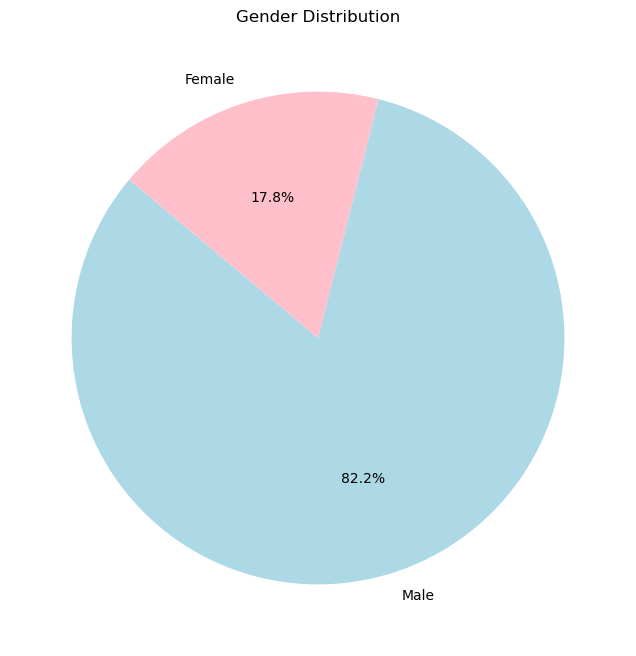

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'pink', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

In [13]:
gender_counts = df['Gender'].value_counts()

In [14]:
gender_counts

Gender
Male      235950
Female     51212
Name: count, dtype: int64

In [19]:
import geopandas as gpd

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/0f/9c96hg_x3xqbsl3jdxctzkqm0000gn/T/ipykernel_1263/3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [23]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

In [24]:
world = world.merge(country_counts, how='left', left_on='name', right_on='Country')

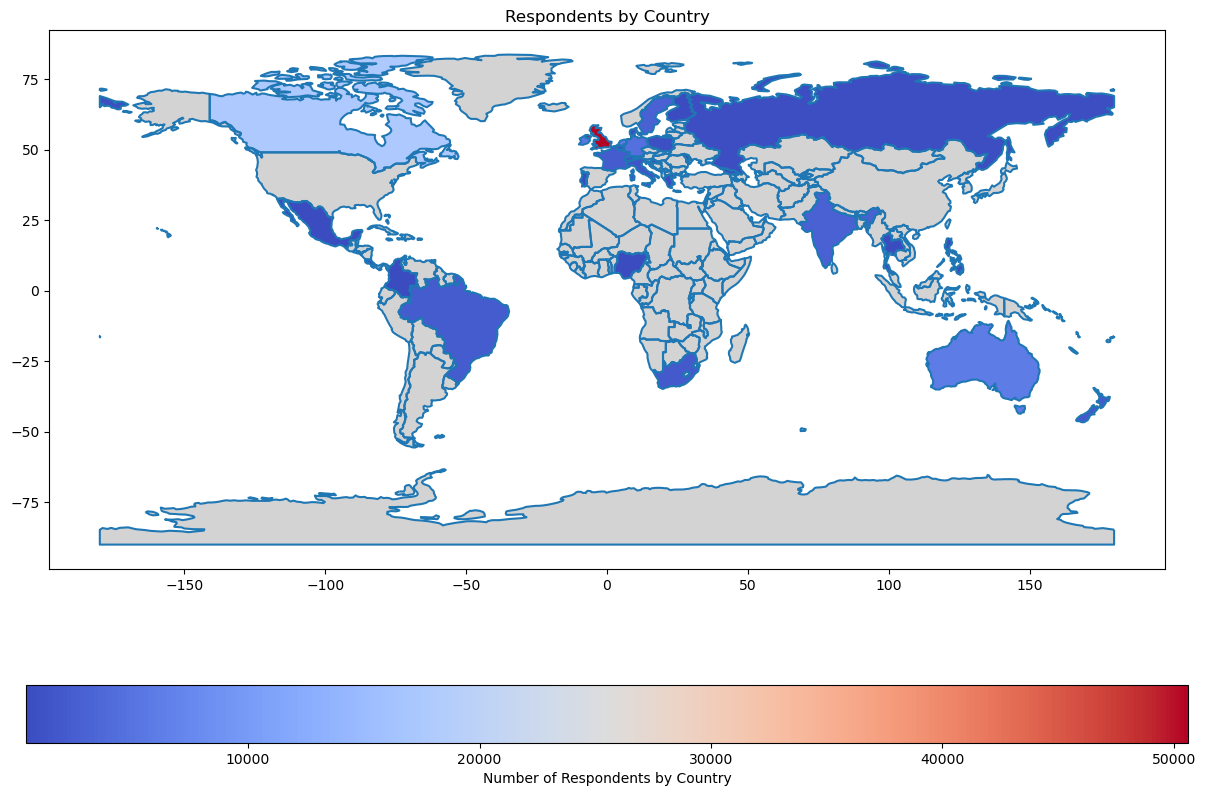

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Count', ax=ax, legend=True, legend_kwds={'label': "Number of Respondents by Country",
                                                            'orientation': "horizontal"},
           cmap='coolwarm', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Respondents by Country')
plt.show()

In [26]:
countries_counts = df['Country'].value_counts()

In [27]:
countries_counts

Country
United States             168056
United Kingdom             50624
Canada                     17556
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Switzerland                 1560
Israel                      1560
Italy                       1560
Belgium                      824
Poland                       824
Russia                       780
Denmark                      780
Singapore                    780
Greece                       780
Czech Republic               390
Georgia                      390
Colombia                     390
Moldova                      390
Mexico                       390
Croatia                      390
Thailand                     390
Nigeria                      390
Bo

In [28]:
country_percentage = (countries_counts / countries_counts.sum()) * 100
print(country_percentage)

Country
United States             58.523064
United Kingdom            17.629073
Canada                     6.113622
Australia                  2.098467
Netherlands                2.052500
Ireland                    1.932011
Germany                    1.629742
Sweden                     0.981328
India                      0.966005
France                     0.814871
Brazil                     0.814871
New Zealand                0.694382
South Africa               0.694382
Switzerland                0.543247
Israel                     0.543247
Italy                      0.543247
Belgium                    0.286946
Poland                     0.286946
Russia                     0.271624
Denmark                    0.271624
Singapore                  0.271624
Greece                     0.271624
Czech Republic             0.135812
Georgia                    0.135812
Colombia                   0.135812
Moldova                    0.135812
Mexico                     0.135812
Croatia             

In [29]:
occupation_counts = df['Occupation'].value_counts()
occupation_percentage = (occupation_counts / occupation_counts.sum()) * 100
print(occupation_percentage)

Occupation
Housewife    22.695552
Student      21.133367
Corporate    20.948802
Others       18.070984
Business     17.151294
Name: count, dtype: float64


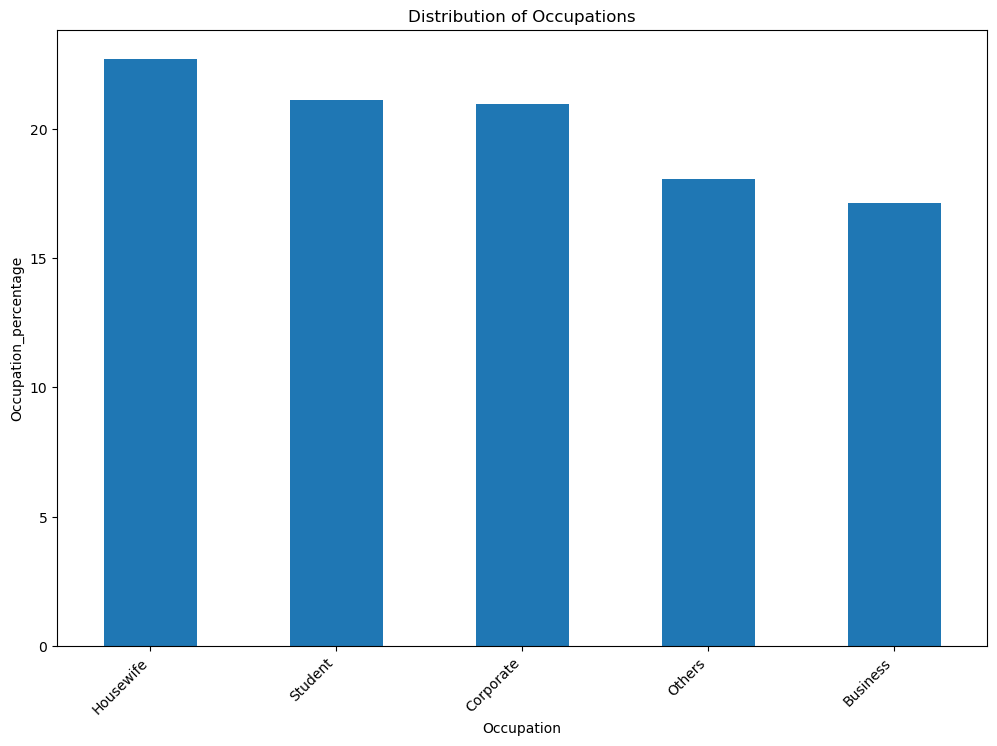

In [30]:
plt.figure(figsize=(12, 8))
occupation_percentage.plot(kind='bar')
plt.title('Distribution of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Occupation_percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

In [31]:
self_employed_counts = df['self_employed'].value_counts()
self_employed_percentage = (self_employed_counts / self_employed_counts.sum()) * 100
print(self_employed_percentage)

self_employed
No     89.842667
Yes    10.157333
Name: count, dtype: float64


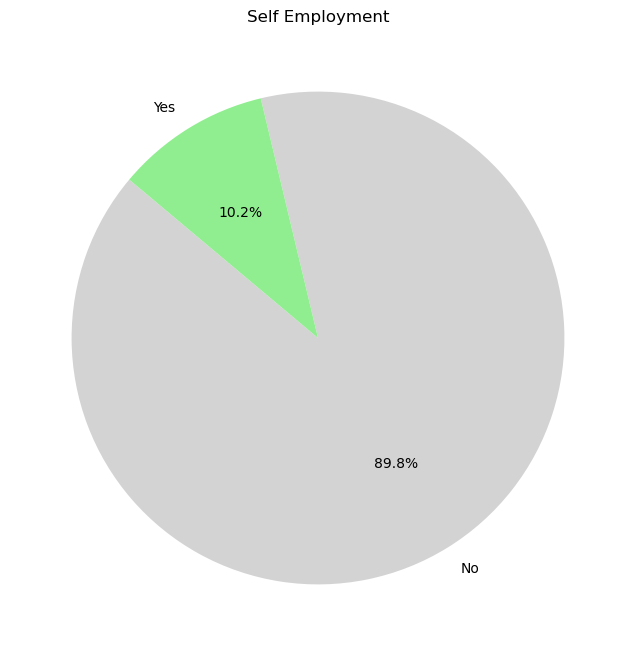

In [32]:
plt.figure(figsize=(8, 8))
plt.pie(self_employed_counts, labels=self_employed_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgrey', 'lightgreen', 'lightcoral'])
plt.title('Self Employment')
plt.show()

In [33]:
family_history_counts = df['family_history'].value_counts()


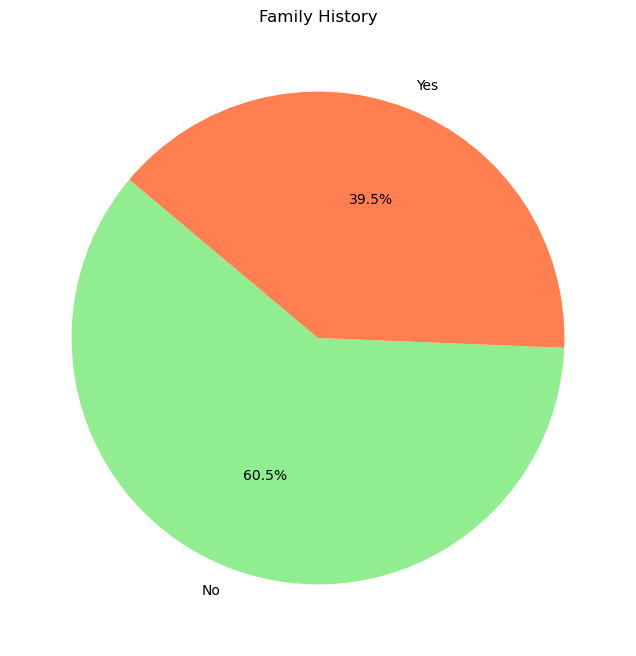

In [34]:
plt.figure(figsize=(8, 8))
plt.pie(family_history_counts, labels=family_history_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'coral', 'lightcoral'])
plt.title('Family History')
plt.show()

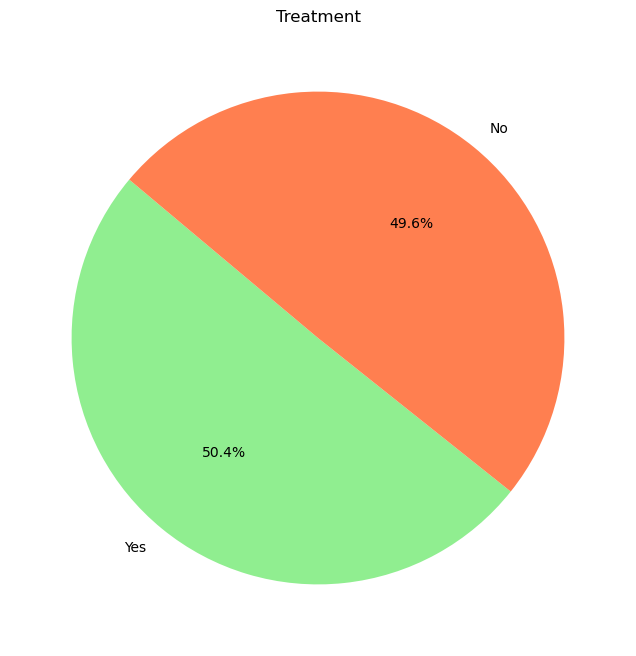

In [35]:
treatment_counts = df['treatment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'coral', 'lightcoral'])
plt.title('Treatment')
plt.show()

In [36]:
Days_Indoors_counts = df['Days_Indoors'].value_counts()
Days_Indoors_percentage = (Days_Indoors_counts / Days_Indoors_counts.sum()) * 100
print(Days_Indoors_percentage)

Days_Indoors
1-14 days             21.739993
31-60 days            20.763541
Go out Every day      19.961903
More than 2 months    19.124397
15-30 days            18.410166
Name: count, dtype: float64


In [37]:
Growing_Stress_counts = df['Growing_Stress'].value_counts()
Growing_Stress_percentage = (Growing_Stress_counts / Growing_Stress_counts.sum()) * 100
print(Growing_Stress_percentage)

Growing_Stress
Maybe    34.205431
Yes      34.076236
No       31.718333
Name: count, dtype: float64


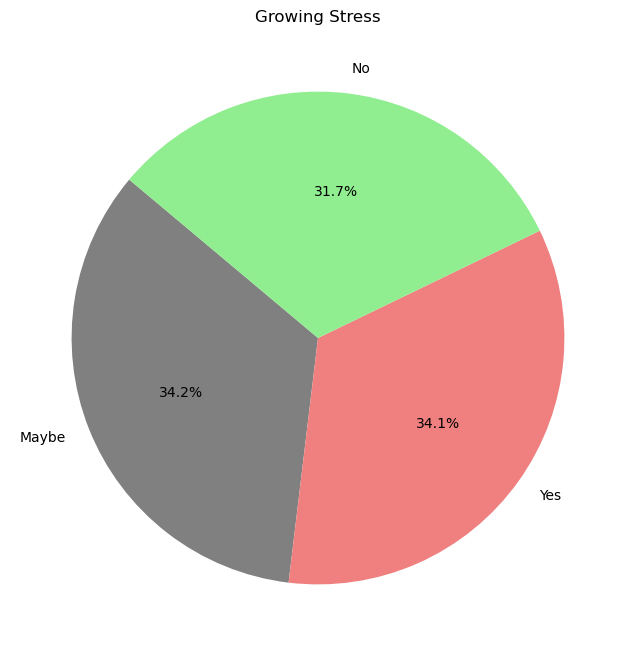

In [38]:
plt.figure(figsize=(8, 8))
plt.pie(Growing_Stress_counts, labels=Growing_Stress_counts.index, autopct='%1.1f%%', startangle=140, colors=['grey', 'lightcoral', 'lightgreen'])
plt.title('Growing Stress')
plt.show()

Changes_Habits
Yes      37.462826
Maybe    32.550616
No       29.986558
Name: count, dtype: float64


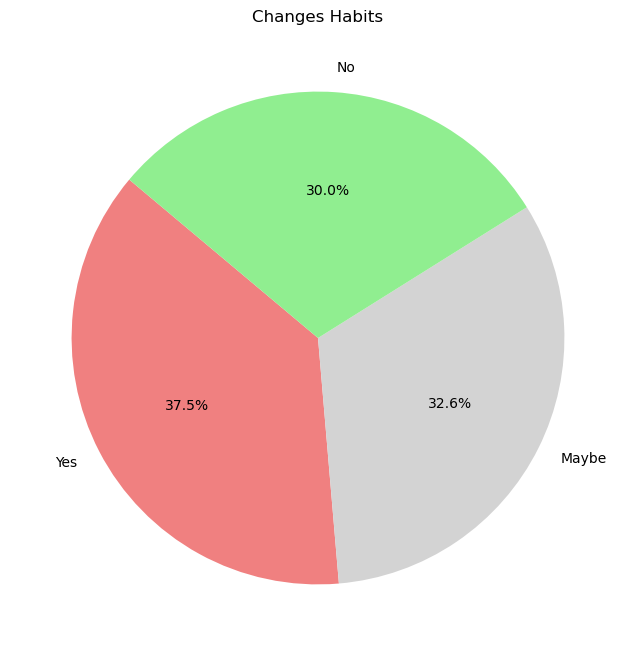

In [39]:
Changes_Habits_counts = df['Changes_Habits'].value_counts()
Changes_Habits_percentage = (Changes_Habits_counts / Changes_Habits_counts.sum()) * 100
print(Changes_Habits_percentage)
plt.figure(figsize=(8, 8))
plt.pie(Changes_Habits_counts, labels=Changes_Habits_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgrey', 'lightgreen'])
plt.title('Changes Habits')
plt.show()

Mental_Health_History
No       35.582354
Maybe    32.617129
Yes      31.800517
Name: count, dtype: float64


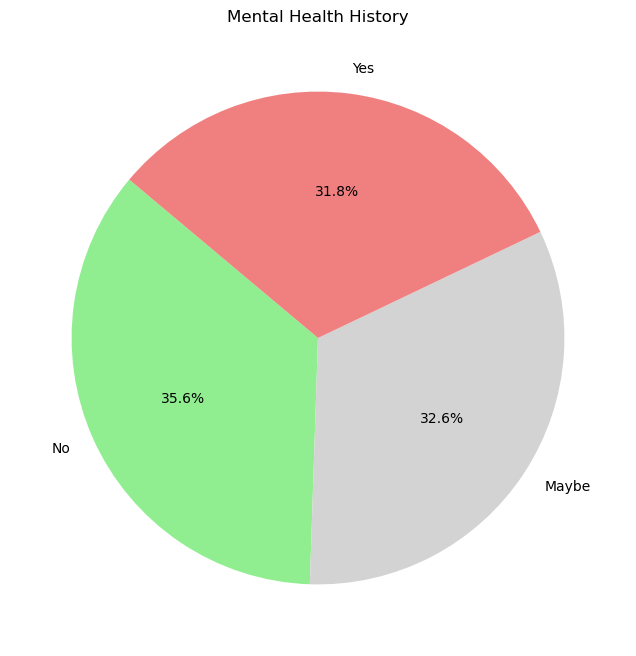

In [40]:
Mental_Health_History_counts = df['Mental_Health_History'].value_counts()
Mental_Health_History_percentage = (Mental_Health_History_counts / Mental_Health_History_counts.sum()) * 100
print(Mental_Health_History_percentage)
plt.figure(figsize=(8, 8))
plt.pie(Mental_Health_History_counts, labels=Mental_Health_History_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightgrey', 'lightcoral'])
plt.title('Mental Health History')
plt.show()

Mood_Swings
Medium    34.570034
Low       34.148669
High      31.281298
Name: count, dtype: float64


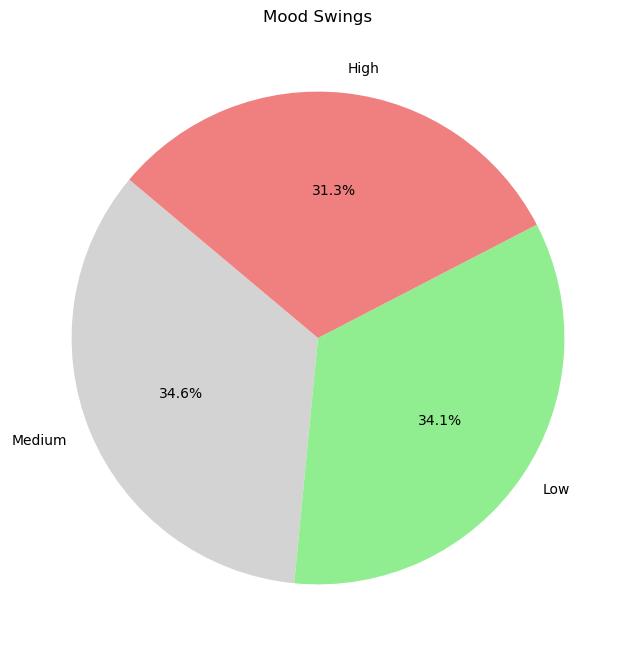

In [41]:
Mood_Swings_counts = df['Mood_Swings'].value_counts()
Mood_Swings_percentage = (Mood_Swings_counts / Mood_Swings_counts.sum()) * 100
print(Mood_Swings_percentage)
plt.figure(figsize=(8, 8))
plt.pie(Mood_Swings_counts, labels=Mood_Swings_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgrey', 'lightgreen', 'lightcoral'])
plt.title('Mood Swings')
plt.show()

Coping_Struggles
No     52.795635
Yes    47.204365
Name: count, dtype: float64


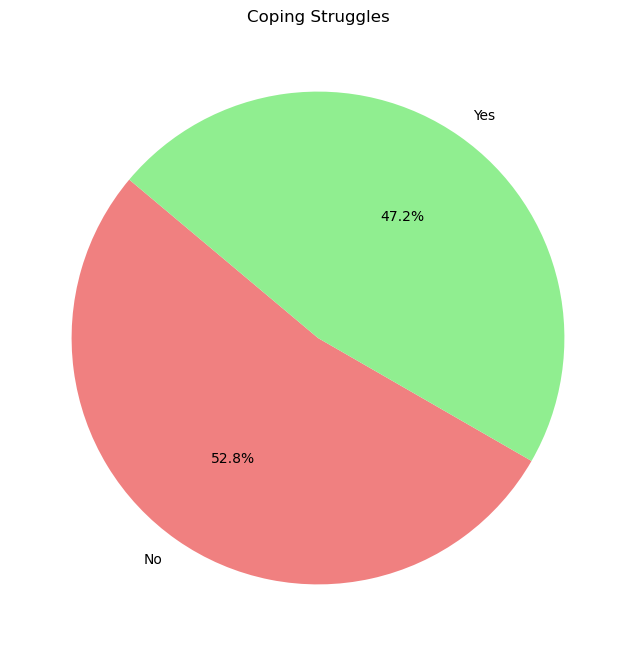

In [42]:
Coping_Struggles_counts = df['Coping_Struggles'].value_counts()
Coping_Struggles_percentage = (Coping_Struggles_counts / Coping_Struggles_counts.sum()) * 100
print(Coping_Struggles_percentage)
plt.figure(figsize=(8, 8))
plt.pie(Coping_Struggles_counts, labels=Coping_Struggles_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen', 'lightcoral'])
plt.title('Coping Struggles')
plt.show()

Work_Interest
No       36.203955
Maybe    34.611125
Yes      29.184920
Name: count, dtype: float64


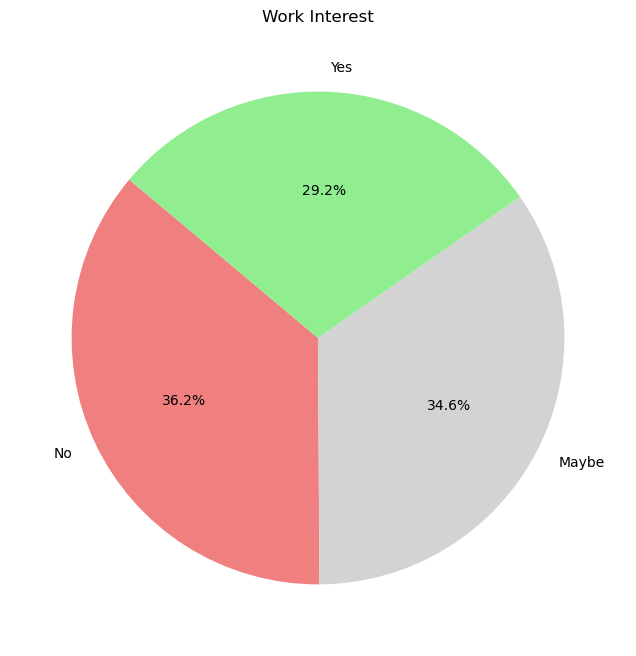

In [43]:
Work_Interest_counts = df['Work_Interest'].value_counts()
Work_Interest_percentage = (Work_Interest_counts / Work_Interest_counts.sum()) * 100
print(Work_Interest_percentage)
plt.figure(figsize=(8, 8))
plt.pie(Work_Interest_counts, labels=Work_Interest_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgrey', 'lightgreen'])
plt.title('Work Interest')
plt.show()

Social_Weakness
Maybe    35.366448
No       33.300715
Yes      31.332837
Name: count, dtype: float64


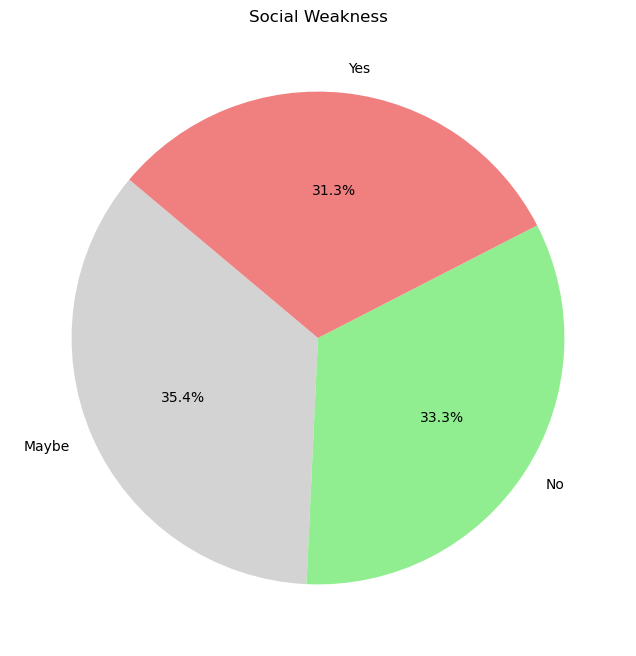

In [44]:
Social_Weakness_counts = df['Social_Weakness'].value_counts()
Social_Weakness_percentage = (Social_Weakness_counts / Social_Weakness_counts.sum()) * 100
print(Social_Weakness_percentage)
plt.figure(figsize=(8, 8))
plt.pie(Social_Weakness_counts, labels=Social_Weakness_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgrey', 'lightgreen', 'lightcoral'])
plt.title('Social Weakness')
plt.show()

Social_Weakness
Maybe    35.366448
No       33.300715
Yes      31.332837
Name: count, dtype: float64


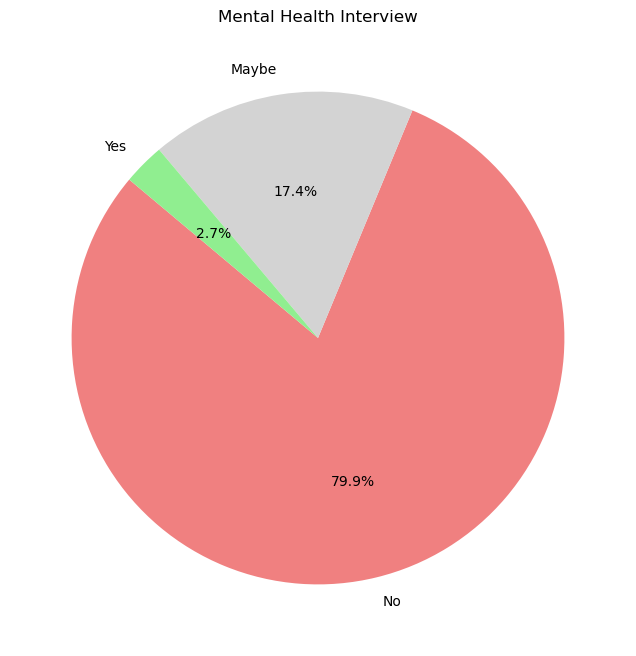

In [45]:
mental_health_interview_counts = df['mental_health_interview'].value_counts()
mental_health_interview_percentage = (mental_health_interview_counts / mental_health_interview_counts.sum()) * 100
print(Social_Weakness_percentage)
plt.figure(figsize=(8, 8))
plt.pie(mental_health_interview_counts, labels=mental_health_interview_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgrey', 'lightgreen'])
plt.title('Mental Health Interview')
plt.show()

care_options
No          40.570131
Yes         32.907557
Not sure    26.522311
Name: count, dtype: float64


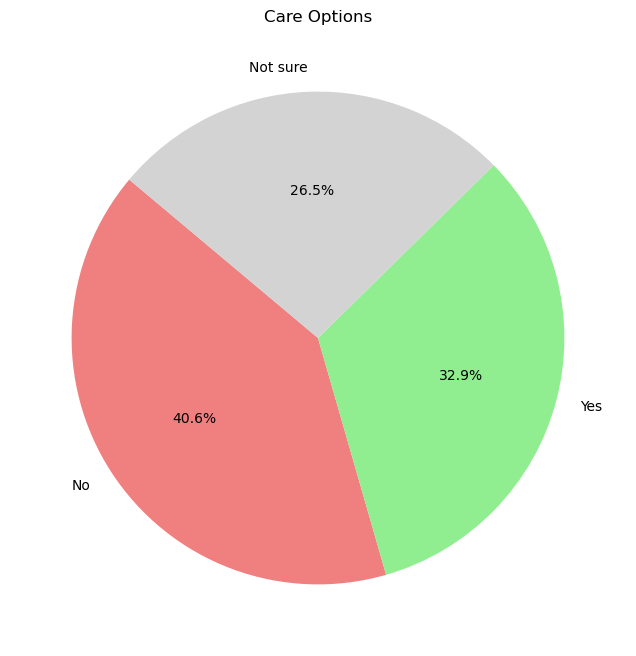

In [46]:
care_options_counts = df['care_options'].value_counts()
care_options_percentage = (care_options_counts / care_options_counts.sum()) * 100
print(care_options_percentage)
plt.figure(figsize=(8, 8))
plt.pie(care_options_counts, labels=care_options_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen', 'lightgrey'])
plt.title('Care Options')
plt.show()

   Gender Occupation  count   total  percentage
5    Male  Housewife  53845  235950   22.820513
0  Female    Student  11682   51212   22.811060
1  Female  Housewife  11328   51212   22.119816
6    Male  Corporate  51425  235950   21.794872
7    Male    Student  49005  235950   20.769231
2  Female     Others  10148   51212   19.815668
3  Female   Business   9322   51212   18.202765
8    Male     Others  41745  235950   17.692308
4  Female  Corporate   8732   51212   17.050691
9    Male   Business  39930  235950   16.923077


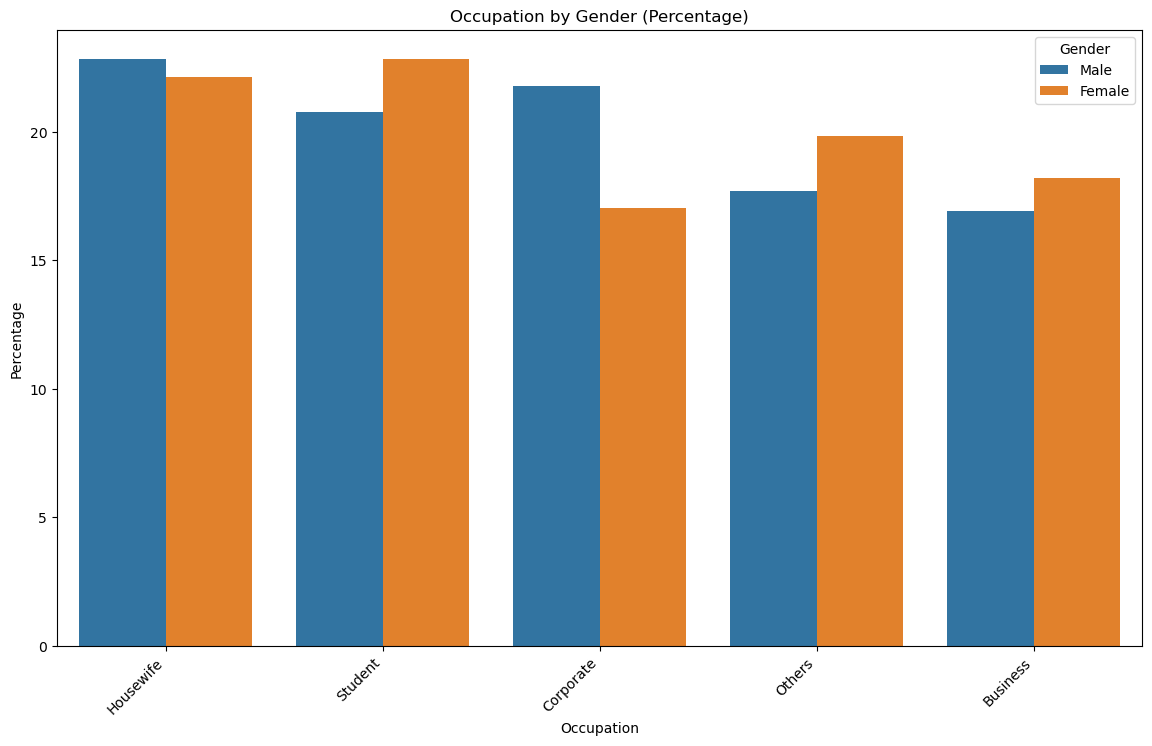

In [60]:
gender_data = (
    df
    .groupby('Gender')['Occupation']
    .value_counts()
    .reset_index(name='count')
)


total_counts = gender_data.groupby('Gender')['count'].sum().reset_index(name='total')


gender_data = pd.merge(gender_data, total_counts, on='Gender')


gender_data['percentage'] = (gender_data['count'] / gender_data['total']) * 100


gender_data = gender_data.sort_values(by='percentage', ascending=False)


print(gender_data)


plt.figure(figsize=(14, 8))
sns.barplot(data=gender_data, x='Occupation', y='percentage', hue='Gender')
plt.title("Occupation by Gender (Percentage)")
plt.xlabel("Occupation")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()




   Timestamp_10/2/2014 21:25  Timestamp_11/16/2014 8:42  \
3                      False                      False   
4                      False                      False   
5                      False                      False   
6                      False                      False   
7                      False                      False   

   Timestamp_12/1/2014 9:58  Timestamp_12/15/2014 0:43  \
3                     False                      False   
4                     False                      False   
5                     False                      False   
6                     False                      False   
7                     False                      False   

   Timestamp_2/1/2016 23:04  Timestamp_2/21/2015 10:00  \
3                     False                      False   
4                     False                      False   
5                     False                      False   
6                     False                      False   
7     

                             Timestamp_10/2/2014 21:25  \
Timestamp_10/2/2014 21:25                     1.000000   
Timestamp_11/16/2014 8:42                    -0.001435   
Timestamp_12/1/2014 9:58                     -0.001514   
Timestamp_12/15/2014 0:43                    -0.001435   
Timestamp_2/1/2016 23:04                     -0.001435   
...                                                ...   
mental_health_interview_No                    0.019543   
mental_health_interview_Yes                  -0.006520   
care_options_No                              -0.032145   
care_options_Not sure                         0.064756   
care_options_Yes                             -0.027247   

                             Timestamp_11/16/2014 8:42  \
Timestamp_10/2/2014 21:25                    -0.001435   
Timestamp_11/16/2014 8:42                     1.000000   
Timestamp_12/1/2014 9:58                     -0.001435   
Timestamp_12/15/2014 0:43                    -0.001360   
Timestamp_2/1

   Timestamp_10/2/2014 21:25  Timestamp_11/16/2014 8:42  \
3                      False                      False   
4                      False                      False   
5                      False                      False   
6                      False                      False   
7                      False                      False   

   Timestamp_12/1/2014 9:58  Timestamp_12/15/2014 0:43  \
3                     False                      False   
4                     False                      False   
5                     False                      False   
6                     False                      False   
7                     False                      False   

   Timestamp_2/1/2016 23:04  Timestamp_2/21/2015 10:00  \
3                     False                      False   
4                     False                      False   
5                     False                      False   
6                     False                      False   
7     

  Occupation Coping_Struggles  percentage
0   Business              Yes    0.525461
3  Corporate              Yes    0.418688
5  Housewife              Yes    0.445092
7     Others              Yes    0.470275
8    Student              Yes    0.512037


/var/folders/0f/9c96hg_x3xqbsl3jdxctzkqm0000gn/T/ipykernel_1263/2206909346.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mental_health_data, x='Occupation', y='percentage', palette='viridis')


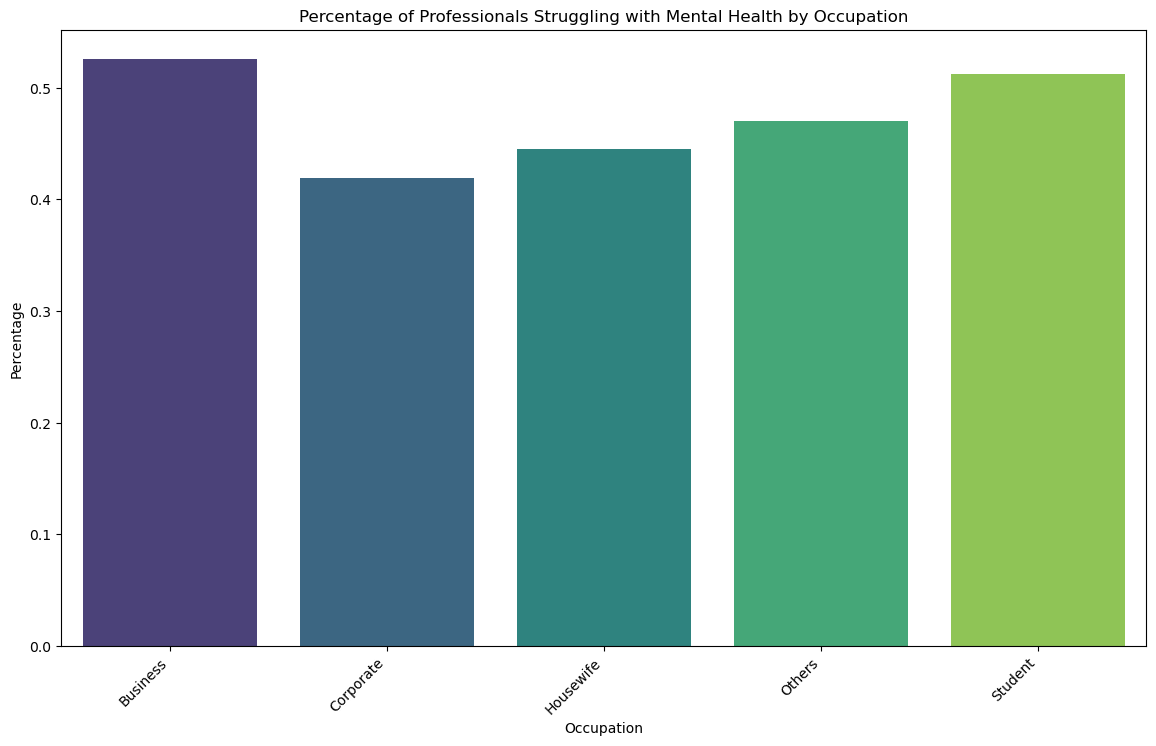

In [62]:
mental_health_data = (
    df
    .groupby('Occupation')['Coping_Struggles']
    .value_counts(normalize=True)
    .reset_index(name='percentage')
    .sort_values(by=['Occupation', 'percentage'], ascending=[True, False])
)


mental_health_data = mental_health_data[mental_health_data['Coping_Struggles'] == 'Yes']


print(mental_health_data)


plt.figure(figsize=(14, 8))
sns.barplot(data=mental_health_data, x='Occupation', y='percentage', palette='viridis')
plt.title("Percentage of Professionals Struggling with Mental Health by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')
plt.show()


  Occupation treatment  count  total  percentage
0   Business        No  24307  49252   49.352311
1   Business       Yes  24945  49252   50.647689
2  Corporate        No  30278  60157   50.331632
3  Corporate       Yes  29879  60157   49.668368
4  Housewife        No  32388  65173   49.695426
5  Housewife       Yes  32785  65173   50.304574
6     Others        No  25538  51893   49.212803
7     Others       Yes  26355  51893   50.787197
8    Student        No  29907  60687   49.280736
9    Student       Yes  30780  60687   50.719264


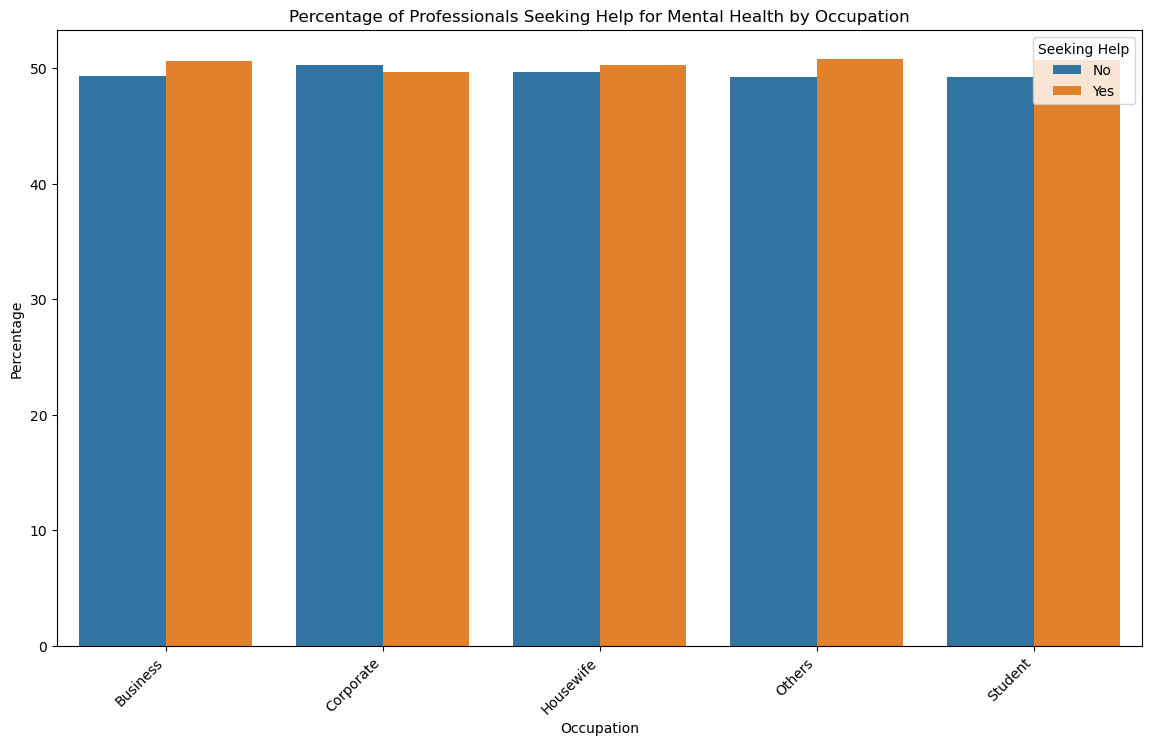

In [63]:
help_seeking_data = (
    df
    .groupby(['Occupation', 'treatment'])
    .size()
    .reset_index(name='count')
)

total_counts = help_seeking_data.groupby('Occupation')['count'].sum().reset_index(name='total')

help_seeking_data = pd.merge(help_seeking_data, total_counts, on='Occupation')

help_seeking_data['percentage'] = (help_seeking_data['count'] / help_seeking_data['total']) * 100

print(help_seeking_data)

plt.figure(figsize=(14, 8))
sns.barplot(data=help_seeking_data, x='Occupation', y='percentage', hue='treatment')
plt.title("Percentage of Professionals Seeking Help for Mental Health by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Seeking Help')
plt.show()

   Gender treatment   count   total  percentage
0  Female        No   16058   51212   31.355932
1  Female       Yes   35154   51212   68.644068
2    Male        No  126360  235950   53.553719
3    Male       Yes  109590  235950   46.446281


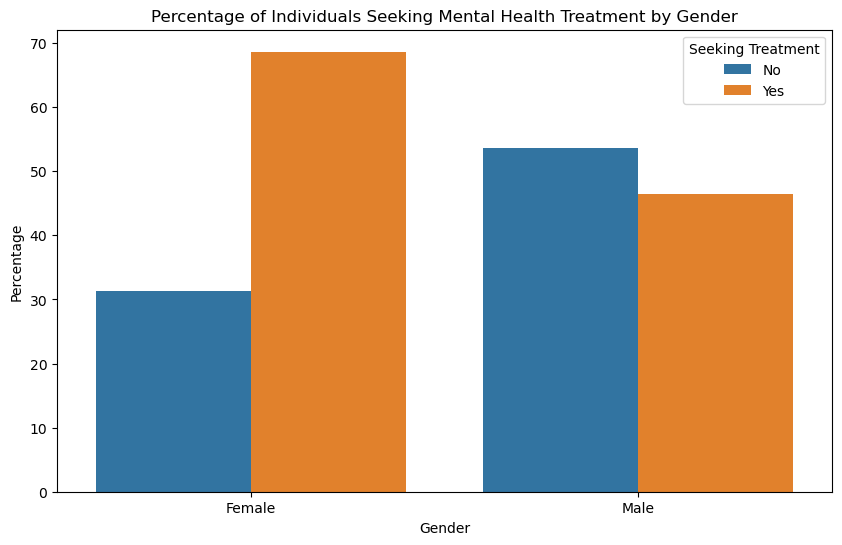

In [64]:
gender_treatment_data = (
    df
    .groupby(['Gender', 'treatment'])
    .size()
    .reset_index(name='count')
)
total_counts = gender_treatment_data.groupby('Gender')['count'].sum().reset_index(name='total')

gender_treatment_data = pd.merge(gender_treatment_data, total_counts, on='Gender')

gender_treatment_data['percentage'] = (gender_treatment_data['count'] / gender_treatment_data['total']) * 100

print(gender_treatment_data)

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_treatment_data, x='Gender', y='percentage', hue='treatment')
plt.title("Percentage of Individuals Seeking Mental Health Treatment by Gender")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.legend(title='Seeking Treatment')
plt.show()

   Gender Mood_Swings  count   total  percentage
0  Female        High  17228   51212   33.640553
1  Female         Low  16992   51212   33.179724
2  Female      Medium  16992   51212   33.179724
3    Male        High  72600  235950   30.769231
4    Male         Low  81070  235950   34.358974
5    Male      Medium  82280  235950   34.871795


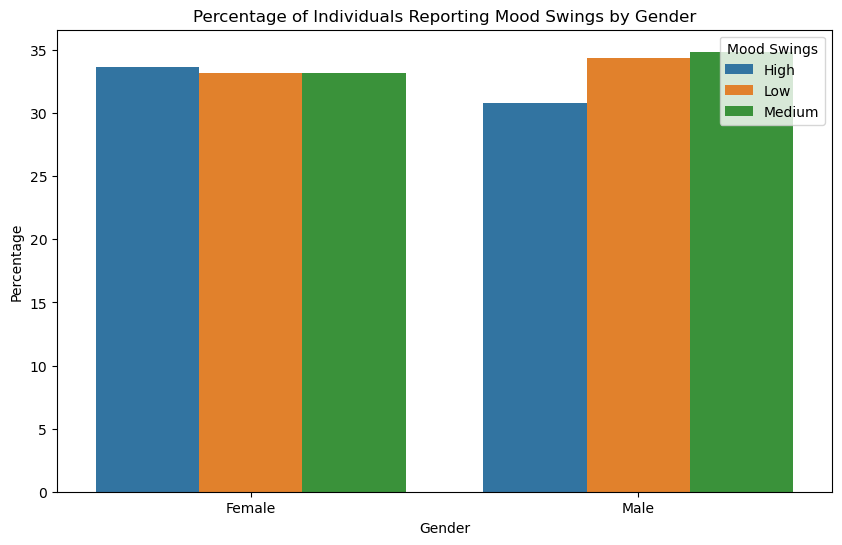

In [65]:
gender_mood_data = (
    df
    .groupby(['Gender', 'Mood_Swings'])
    .size()
    .reset_index(name='count')
)

total_counts = gender_mood_data.groupby('Gender')['count'].sum().reset_index(name='total')

gender_mood_data = pd.merge(gender_mood_data, total_counts, on='Gender')

gender_mood_data['percentage'] = (gender_mood_data['count'] / gender_mood_data['total']) * 100

print(gender_mood_data)

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_mood_data, x='Gender', y='percentage', hue='Mood_Swings')
plt.title("Percentage of Individuals Reporting Mood Swings by Gender")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.legend(title='Mood Swings')
plt.show()


   Occupation Growing_Stress  count  total  percentage
0    Business          Maybe  16747  49252   34.002680
1    Business             No  13958  49252   28.339966
2    Business            Yes  18547  49252   37.657354
3   Corporate          Maybe  16747  60157   27.838822
4   Corporate             No  19905  60157   33.088419
5   Corporate            Yes  23505  60157   39.072760
6   Housewife          Maybe  23741  65173   36.427662
7   Housewife             No  22192  65173   34.050911
8   Housewife            Yes  19240  65173   29.521428
9      Others          Maybe  18075  51893   34.831287
10     Others             No  18680  51893   35.997148
11     Others            Yes  15138  51893   29.171565
12    Student          Maybe  22915  60687   37.759322
13    Student             No  16348  60687   26.938224
14    Student            Yes  21424  60687   35.302454


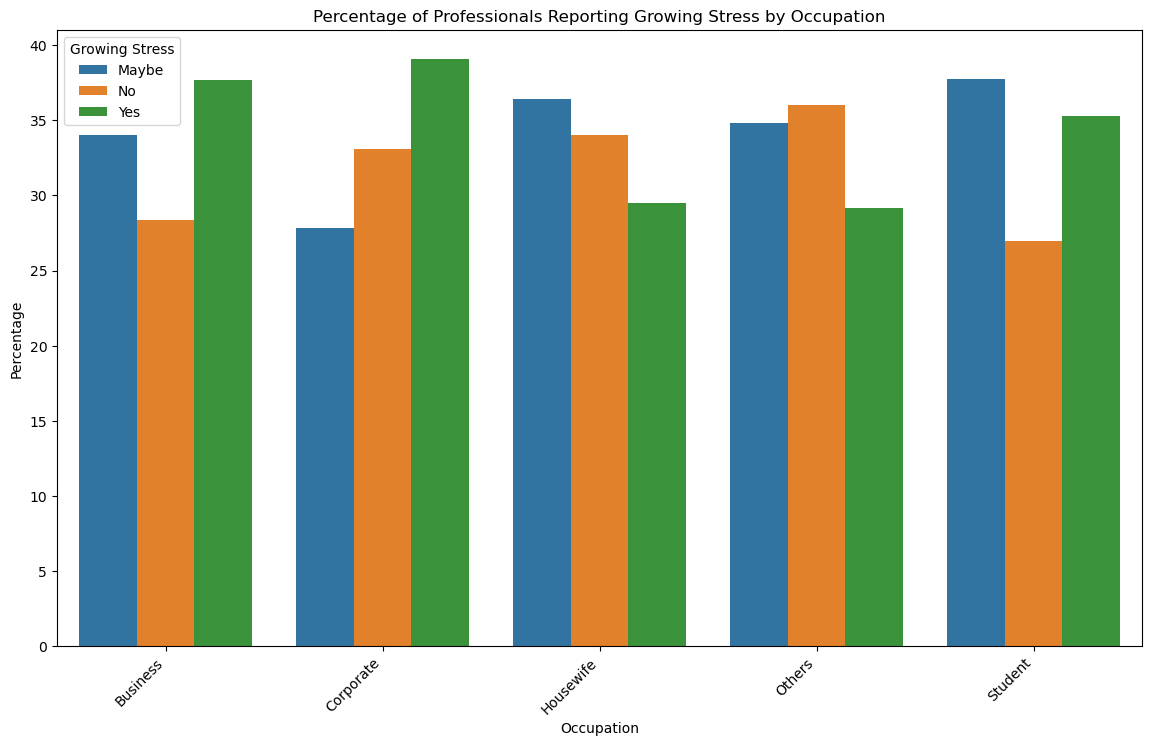

In [66]:
occupation_stress_data = (
    df
    .groupby(['Occupation', 'Growing_Stress'])
    .size()
    .reset_index(name='count')
)

total_counts = occupation_stress_data.groupby('Occupation')['count'].sum().reset_index(name='total')

occupation_stress_data = pd.merge(occupation_stress_data, total_counts, on='Occupation')

occupation_stress_data['percentage'] = (occupation_stress_data['count'] / occupation_stress_data['total']) * 100

print(occupation_stress_data)

plt.figure(figsize=(14, 8))
sns.barplot(data=occupation_stress_data, x='Occupation', y='percentage', hue='Growing_Stress')
plt.title("Percentage of Professionals Reporting Growing Stress by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Growing Stress')
plt.show()

In [67]:
print(df['Age'].describe())

print(df['Age'].unique())

df = df[(df['Age'] > 0) & (df['Age'] < 100)]

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

KeyError: 'Age'